# Credit Scoring Model (Real Dataset)
This notebook builds classification models to predict creditworthiness using the German Credit dataset from OpenML. Steps include data loading, EDA, preprocessing (encoding & scaling), modeling, evaluation, and conclusions.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Load Dataset

In [2]:
# Fetch German Credit dataset
credit = fetch_openml(name='credit-g', version=1, as_frame=True)
df = credit.frame.copy()

# Convert 'class' to binary: good=1, bad=0
df['creditworthy'] = (df['class'] == 'good').astype(int)
df.drop(columns=['class'], inplace=True)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,creditworthy
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0


## 3. Exploratory Data Analysis

Dataset shape: (1000, 21)
creditworthy
1    700
0    300
Name: count, dtype: int64


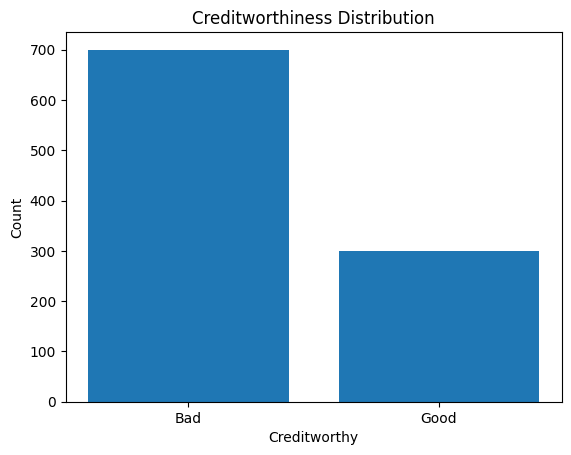

In [3]:
# Dataset shape and target distribution
print(f"Dataset shape: {df.shape}")
print(df['creditworthy'].value_counts())

# Plot target distribution
counts = df['creditworthy'].value_counts()
plt.figure()
plt.bar(['Bad','Good'], counts.values)
plt.title('Creditworthiness Distribution')
plt.xlabel('Creditworthy')
plt.ylabel('Count')
plt.show()

## 4. Data Preprocessing

In [6]:

cat_cols = df.select_dtypes(include=['category', 'object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df_encoded.drop('creditworthy', axis=1)
y = df_encoded['creditworthy']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Modeling

In [7]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': acc,
        'report': classification_report(y_test, y_pred, target_names=['Bad','Good']),
        'cm': confusion_matrix(y_test, y_pred)
    }
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.7050
Random Forest Accuracy: 0.7250
SVM Accuracy: 0.7450


## 6. Evaluation


Logistic Regression Classification Report:
               precision    recall  f1-score   support

         Bad       0.51      0.45      0.48        60
        Good       0.78      0.81      0.79       140

    accuracy                           0.70       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.70      0.70      0.70       200



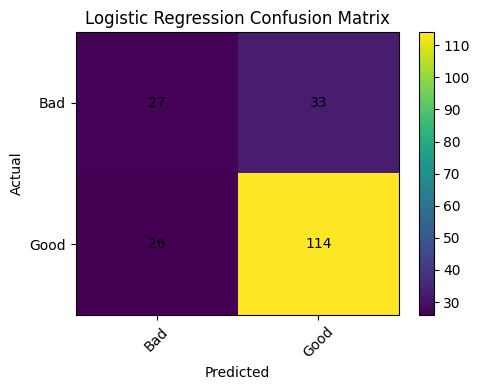


Random Forest Classification Report:
               precision    recall  f1-score   support

         Bad       0.56      0.38      0.46        60
        Good       0.77      0.87      0.82       140

    accuracy                           0.72       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.71      0.72      0.71       200



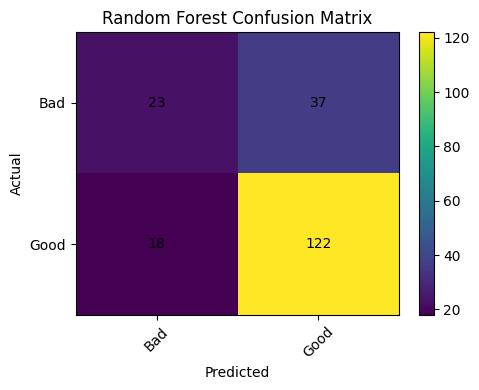


SVM Classification Report:
               precision    recall  f1-score   support

         Bad       0.62      0.40      0.48        60
        Good       0.78      0.89      0.83       140

    accuracy                           0.74       200
   macro avg       0.70      0.65      0.66       200
weighted avg       0.73      0.74      0.73       200



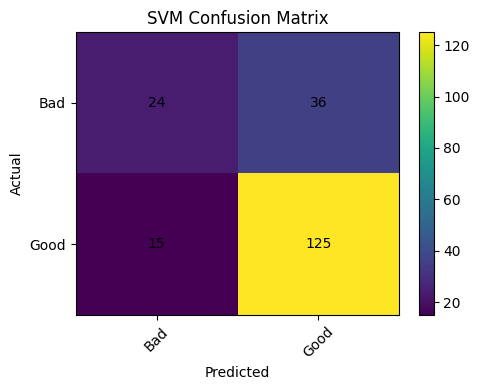

In [8]:
for name, res in results.items():
    print(f"\n{name} Classification Report:\n", res['report'])
    cm = res['cm']
    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation='nearest', aspect='auto')
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()
    ticks = np.arange(2)
    plt.xticks(ticks, ['Bad','Good'], rotation=45)
    plt.yticks(ticks, ['Bad','Good'])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()